# Getting Started


## Welcome to using Underworld! 

[Underworld](http://www.underworldcode.org) is a Python library for the development of long time scale earth process models. The Underworld Python interface is designed to facilitate interactive and intuitive model development. To this end, we embrace Jupyter Notebooks as the preferred development environment, although the standard Python interpreter is the only requirement. Underworld utilises MPI parallelisation to allow large simulation across HPC facilities. The Python interface was partly funded by the NeCTAR [eResearch_tools](http://www.nectar.org.au/eresearch-tools) program.

Underworld includes the `visualisation` submodule for interactive visualisation within the Jupter Notebook environment, and for seamless visualisation capabilities across parallel simulations. The [LavaVu](https://github.com/OKaluza/LavaVu) Python package is leveraged for rendering capabilities. 


## Resources

There are numerous resources that you might find useful for learning and using Underworld:

1. [underworld2.readthedocs.io](http://underworld2.readthedocs.io): The page where most of our primary documentation is published, including this user guide, and the API documentation. It also links out to most other resources.
1. [github.com/underworldcode/underworld2](https://github.com/underworldcode/underworld2): Our code repository. You can keep track of changes to the codes base here, and you can also browse most of our documention directly within the Github interface. Don't forget to `Star` and `Watch` our project if you find it useful! 
1. [github.com/underworldcode/underworld2/issues](https://github.com/underworldcode/underworld2/issues): Please use our issue tracker to report any bugs or difficulties you encounter. This includes any general usage questions as well as technial issues. If you wish to submit a suspected bug, please include a **minimal** example which allows us to reproduce the issue. It is also the place to post any feature requests you may have!
1. **The User Guide**: A more focused look at the various aspects of Underworld modelling. Note that each section is a self container Jupyter Notebook document, available in the Underworld repository (`docs/user_guide`). It is also published at the Underworld ReadTheDocs page.
1. **Examples**: These notebooks go through the entire Underworld workflow for constructing and solving geophysics models. These models demonstrate Underworld current best usage practises, and are guaranteed to operate correctly for each Underworld release. They are available in the repository at `docs/examples`.
1. **API Documentation**: The Underworld API documentation is published at our ReadTheDocs page. Note that the API documentation is embedded in the Python implementation as *docstrings*, and is therefore also available directy via the Python `help()` *built-in*. More usefully, this information is accessible within Jupyter Notebooks via the *tooltips* shortcut `Shift`-`Tab` (when in edit mode).
1. [Underworld Models Library](https://github.com/underworldcode/model_library): A repository of Underworld models. The library includes models which reproduce publication results, tutorials, examples and usage tidbits. Note that these models are not explicitly maintained, and so may not operate against the latest version of Underworld. If you scroll to the end of each model, it should state which version of Underworld the repository model was successfully ran against.


## Required Python Skills

To use Underworld successfully, you will need to have an understanding of the following Python constructs:

1. Basic Python, such as importing modules, and syntax structure (indenting, functions, etc).
1. Containers such as dictionaries, lists and tuples. 
1. Flow control (loops, if-else conditionals, etc).
1. Python objects, object methods, object attributes, object lifecycles.

Most beginner (or intermediate) Python tutorials should cover these concepts. Also useful, though not strictly necessary, is some familiarity with the following:

1. Exception handling (for dealing with errors that might occur). 
1. Context managers (for mesh and swarm deformations). 
1. Operator overloading.

Note that Underworld heavily leverages the `numpy` Python numerical library for all heavy data access and manipulation. All Underworld objects that record heavy data will expose their data via the `data` attribute, which is actually a handle to a `numpy` array. As such, familiary with numpy usage paradigms is a must, and more advanced usage patterns (array slicing, advanced indexing, etc) will become important as your models increase in complexity. 

Similarly, Underworld uses `h5py` for all heavy data disk IO. H5py is a Python library which provides a Python interface to writing/reading `HDF5` format files. While not strictly required, more advanced users will certainly find having some familiarity with the `h5py` libary useful, both for directly querying files Underworld has generated, and also for writing their own files (in preference to CSV for example).


## Jupyter Notebooks

Jupyter Notebooks is the recommended environment for most model development. In Underworld we utilise notebooks to provide inline visualisation of your model configurations, allowing you to quickly see your results, modify as required, and then regenerate and repeat. Equally important is the *tooltips* and *autocomplete* functionality provided within the notebooks. To access tooltips, use `shift`-`tab` while you have the text editing cursor located within an Underworld object (or you can write a question mark after the object, and execute the cell). For autocomplete, after you type a few letters you can press `tab` to be provided with all possible completion options. Using these tools is essential to rapid and frustration free model development, especially for new users. 

If you are new to Jupyter Notebooks, you should familiarise yourself with the notebook environment first. Also, remember the **Help** menu bar option provides useful references and keyboard shortcuts.

### Jupyter Authentication

Jupyter is, by design, a web service providing mechanisms for the execution of arbitrary code, such as your Underworld models (or other Python scripts). However, as a web service, security measures are required to preclude external parties from accessing your Jupyter instances (and thereby potentially executing malicious code). Jupyter therefore requires you to provide an authentication Token upon first accessing the service via your web browser. This token is generated when you first start Jupyter from the command line:

![](Figures/jupyter_token.png)

Simply copy/paste the generated token and enter it manually within your browser (once you have browsed to the Jupyter instance url, often http://127.0.0.1:8888).

For those using the Kitematic GUI to launch our Docker image, Jupyter will be launched automatically, and the token may be found within the **CONTAINER LOGS** dialog:

![](Figures/kitematic_token.png)


## How to get help

If you encounter issues or suspect a bug, please create a ticket using the [issue tracker on github](https://github.com/underworldcode/underworld2/issues).



A quick demo
-----

Let's do a quick run through of setting up some basic Underworld objects.


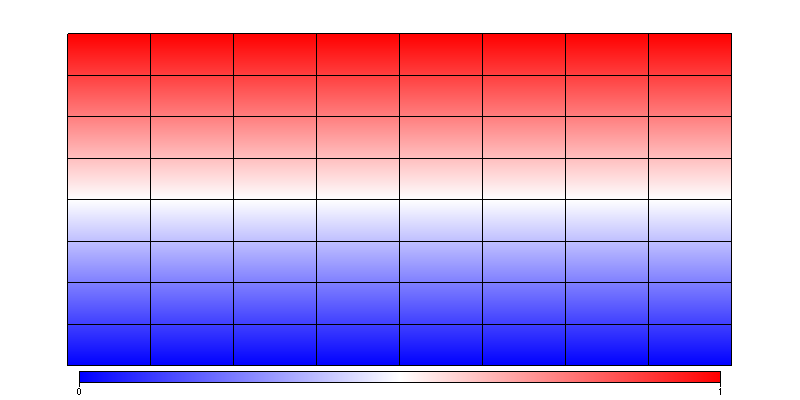

In [1]:
# Import underworld
import underworld as uw
# Create a mesh:
mesh = uw.mesh.FeMesh_Cartesian( elementRes  = (8, 8), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (2., 1.))

# Next we create a mesh variable:
temperatureField = mesh.add_variable( nodeDofCount=1 )

# Let's initialise the variable with some data:
for index, coord in enumerate(mesh.data):
    temperatureField.data[index] = coord[1]  # set the temperature to be the vertical (y) coordinate

# Finally we will render the temperature field.
import underworld.visualisation as vis
fig = vis.Figure(figsize=(800,400))
fig.append( vis.objects.Surface(mesh, temperatureField, colours="blue white red") )
fig.append( vis.objects.Mesh(mesh) )
fig.show()

Typically we might then setup boundary conditions, particle swarms, rheology and systems to be solved.

All of these topics are discussed in the following sections of the user guide.